In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


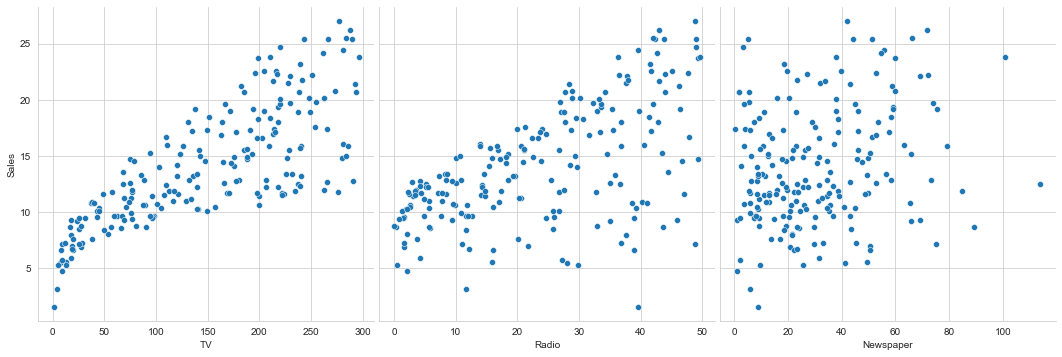

In [28]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=5)


<AxesSubplot:>

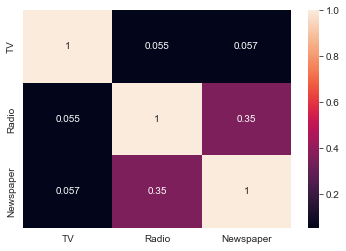

In [29]:
sns.heatmap(df[['TV','Radio','Newspaper']].corr(),annot=True)

In [12]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lin_reg.predict(X_test)

In [16]:
from sklearn import metrics


In [33]:
pd.DataFrame({'Y_test':y_test,'Y_pred':y_pred}).head(10)

,Y_test,Y_pred
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [24]:
mse=metrics.mean_squared_error(y_test,y_pred)
mse

3.7967972367152183

In [23]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

1.5116692224549089

In [25]:
rmse=np.sqrt(mse)
rmse

1.9485372043446383

In [32]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.8609466508230368